In [1]:
import numpy
import gdal
import osr
import glob
import xarray
import re
import pprint

import cartopy
import cmocean
import matplotlib
import matplotlib.pyplot as mp

import matplotlib.cm as mcm

To use tiles, you must use gdal to make a virtual data set (vrt):

    gdalbuildvrt mosaic.vrt *treecover*.tif
    
Then open the .vrt file and go crazy

In [3]:
file_list = sorted(glob.glob('/beegfs/DATA/pritchard/blangenb/HANSEN_GFC_DATA/*lossyear*'))
gdal_datasets = [gdal.Open(f) for f in file_list]
mosaic = gdal.BuildVRT('mosaic.vrt', gdal_datasets)
mosaic_data = numpy.array(mosaic.ReadAsArray())
#gdal_hansen_data = [ds.GetSubDatasets()[0][0] for ds in gdal_datasets]

In [4]:
mosaic_data.shape

(120000, 280000)

In [5]:
mosaic_geotrans = mosaic.GetGeoTransform()

In [6]:
data_extent = (mosaic_geotrans[0], \
               mosaic_geotrans[0] + mosaic.RasterXSize*mosaic_geotrans[1], \
               mosaic_geotrans[3] + mosaic.RasterYSize*mosaic_geotrans[5], \
               mosaic_geotrans[3])

In [ ]:
mp.imshow(mosaic_data, origin='upper')

In [18]:
mosaic_geotrans

(90.0, 0.0002500000000000001, 0.0, 10.0, 0.0, -0.0002500000000000001)

In [7]:
gdal_datasets[3].GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [12]:
band = gdal_datasets[0].ReadAsArray()#.astype(numpy.float)

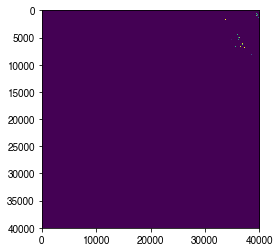

In [13]:
mp.imshow(band, origin='upper', interpolation='None')

In [ ]:
hansen_mosaic = gdal.BuildVRT()